<a href="https://colab.research.google.com/github/Johno4308/ML_googleColab/blob/main/INTRO_TO_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basic Data Exploration

### Using Pandas to Get Familiar With Your Data

The first step in any machine learning project is familiarize yourself with the data. You'll use the Pandas library for this. Pandas is the primary tool data scientists use for exploring and manipulating data. Most people abbreviate pandas in their code as pd. We do this with the command

THE LESSON: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot/data

In [ ]:
import pandas as pd

The most important part of the Pandas library is the DataFrame. A DataFrame holds the type of data you might think of as a table. This is similar to a sheet in Excel, or a table in a SQL database.

As an example, we'll look at data about home prices in Melbourne, Australia. In the hands-on exercises, you will apply the same processes to a new dataset, which has home prices in Iowa.

In [ ]:
# save filepath to variable for easier access
melbourne_file_path = 'melb_data.csv'
# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path)
# print a summary of the data in Melbourne data
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6809.000000,6.808000e+03,6808.00000,6808.000000,6808.000000,6808.000000,6808.000000,6808.000000,3817.000000,4364.000000,6808.000000,6808.000000,6808.000000
mean,2.841680,1.091370e+06,8.47215,3095.975323,2.800676,1.509401,1.524236,456.953290,145.449830,1961.177589,-37.809056,144.987059,7815.095182
std,0.957325,6.581367e+05,3.57933,59.537244,0.944510,0.699367,0.921640,1336.263109,158.486262,37.734592,0.060938,0.074027,4395.729809
min,1.000000,8.500000e+04,1.20000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-37.946200,144.788900,394.000000
25%,2.000000,6.500000e+05,5.60000,3044.000000,2.000000,1.000000,1.000000,130.000000,88.000000,1930.000000,-37.852200,144.933075,4675.000000
50%,3.000000,9.100000e+05,8.70000,3081.000000,3.000000,1.000000,1.000000,336.000000,122.000000,1965.000000,-37.802100,144.995800,6821.000000
75%,3.000000,1.350000e+06,11.20000,3145.000000,3.000000,2.000000,2.000000,616.000000,170.000000,1998.000000,-37.762375,145.042300,10412.000000
max,8.000000,6.500000e+06,15.00000,3207.000000,9.000000,8.000000,8.000000,75100.000000,6791.000000,2018.000000,-37.691700,145.143800,21650.000000


## Selecting Data for Modeling

Your dataset had too many variables to wrap your head around, or even to print out nicely. How can you pare down this overwhelming amount of data to something you can understand?

We'll start by picking a few variables using our intuition. Later courses will show you statistical techniques to automatically prioritize variables.

To choose variables/columns, we'll need to see a list of all columns in the dataset. That is done with the columns property of the DataFrame (the bottom line of code below).

In [ ]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
# The Melbourne data has some missing values (some houses for which some variables weren't recorded.)
# We'll learn to handle missing values in a later tutorial.
# Your Iowa data doesn't have missing values in the columns you use.
# So we will take the simplest option for now, and drop houses from our data.
# Don't worry about this much for now, though the code is:

# dropna drops missing values (think of na as "not available")
melbourne_data = melbourne_data.dropna(axis=0)

There are many ways to select a subset of your data. The Pandas course covers these in more depth, but we will focus on two approaches for now.

Dot notation, which we use to select the "prediction target"
Selecting with a column list, which we use to select the "features"
Selecting The Prediction Target
You can pull out a variable with dot-notation. This single column is stored in a Series, which is broadly like a DataFrame with only a single column of data.

We'll use the dot notation to select the column we want to predict, which is called the prediction target. By convention, the prediction target is called y. So the code we need to save the house prices in the Melbourne data is

In [ ]:
y = melbourne_data.Price

## Choosing "Features"

The columns that are inputted into our model (and later used to make predictions) are called "features." In our case, those would be the columns used to determine the home price. Sometimes, you will use all columns except the target as features. Other times you'll be better off with fewer features.

For now, we'll build a model with only a few features. Later on you'll see how to iterate and compare models built with different features.

We select multiple features by providing a list of column names inside brackets. Each item in that list should be a string (with quotes).

Here is an example:

In [ ]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

By convention, this data is called X.

In [ ]:
X = melbourne_data[melbourne_features]

Let's quickly review the data we'll be using to predict house prices using the describe method and the head method, which shows the top few rows.

In [ ]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,2.888798,1.571234,414.578575,-37.808692,144.986590
std,0.970256,0.722767,566.643721,0.060666,0.073687
min,1.000000,1.000000,0.000000,-37.946200,144.788900
25%,2.000000,1.000000,127.000000,-37.851900,144.932150
50%,3.000000,1.000000,320.500000,-37.802300,144.993350
75%,3.000000,2.000000,607.750000,-37.762725,145.042200
max,8.000000,8.000000,15100.000000,-37.691700,145.143600


In [ ]:
X.head()


,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954



## Building Your Model

You will use the scikit-learn library to create your models. When coding, this library is written as sklearn, as you will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames.

The steps to building and using a model are:

- **Define**: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
- **Fit**: Capture patterns from provided data. This is the heart of modeling.
- **Predict**: Just what it sounds like
- **Evaluate**: Determine how accurate the model's predictions are.
Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

Many machine learning models allow some randomness in model training. Specifying a number for random_state ensures you get the same results in each run. This is considered a good practice. You use any number, and model quality won't depend meaningfully on exactly what value you choose.

We now have a fitted model that we can use to make predictions.

In practice, you'll want to make predictions for new houses coming on the market rather than the houses we already have prices for. But we'll make predictions for the first few rows of the training data to see how the predict function works.

In [ ]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


## Model Validation

Measure the performance of your model, so you can test and compare alternatives.

### What is Model Validation
You'll want to evaluate almost every model you ever build. In most (though not all) applications, the relevant measure of model quality is predictive accuracy. In other words, will the model's predictions be close to what actually happens.

Many people make a huge mistake when measuring predictive accuracy. They make predictions with their training data and compare those predictions to the target values in the training data. You'll see the problem with this approach and how to solve it in a moment, but let's think about how we'd do this first.

You'd first need to summarize the model quality into an understandable way. If you compare predicted and actual home values for 10,000 houses, you'll likely find mix of good and bad predictions. Looking through a list of 10,000 predicted and actual values would be pointless. We need to summarize this into a single metric.

There are many metrics for summarizing model quality, but we'll start with one called **Mean Absolute Error** (also called MAE). Let's break down this metric starting with the last word, error.

The prediction error for each house is:

```markdown
error=actual−predicted
```
So, if a house cost $150,000 and you predicted it would cost $100,000 the error is $50,000.

With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. This is our measure of model quality. In plain English, it can be said as

On average, our predictions are off by about X.

To calculate MAE, we first need a model. That is built in a hidden cell below, which you can review by clicking the code button.

Once we have a model, here is how we calculate the mean absolute error:


In [ ]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)


1507.1143737538516

## The Problem with "In-Sample" Scores¶
The measure we just computed can be called an "in-sample" score. We used a single "sample" of houses for both building the model and evaluating it. Here's why this is bad.

Imagine that, in the large real estate market, door color is unrelated to home price.

However, in the sample of data you used to build the model, all homes with green doors were very expensive. The model's job is to find patterns that predict home prices, so it will see this pattern, and it will always predict high prices for homes with green doors.

Since this pattern was derived from the training data, the model will appear accurate in the training data.

But if this pattern doesn't hold when the model sees new data, the model would be very inaccurate when used in practice.

Since models' practical value come from making predictions on new data, we measure performance on data that wasn't used to build the model. The most straightforward way to do this is to exclude some data from the model-building process, and then use those to test the model's accuracy on data it hasn't seen before. This data is called validation data.

## Coding It
The **scikit-learn library has a function train_test_split to break up the data into two pieces**. We'll use some of that data as training data to fit the model, and we'll use the other data as validation data to calculate mean_absolute_error.

In [ ]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

288886.8992753623


Wow!
Your mean absolute error for the in-sample data was about 500 dollars. Out-of-sample it is more than 250,000 dollars.

This is the difference between a model that is almost exactly right, and one that is unusable for most practical purposes. As a point of reference, the average home value in the validation data is 1.1 million dollars. So the error in new data is about a quarter of the average home value.

There are many ways to improve this model, such as experimenting to find better features or different model types.

## Underfitting and Overfitting

Fine-tune your model for better performance.

At the end of this step, you will understand the concepts of underfitting and overfitting, and you will be able to apply these ideas to make your models more accurate.

Experimenting With Different Models
Now that you have a reliable way to measure model accuracy, you can experiment with alternative models and see which gives the best predictions. But what alternatives do you have for models?

You can see in scikit-learn's documentation that the decision tree model has many options (more than you'll want or need for a long time). The most important options determine the tree's depth. Recall from the first lesson in this course that a tree's depth is a measure of how many splits it makes before coming to a prediction. This is a relatively shallow tree

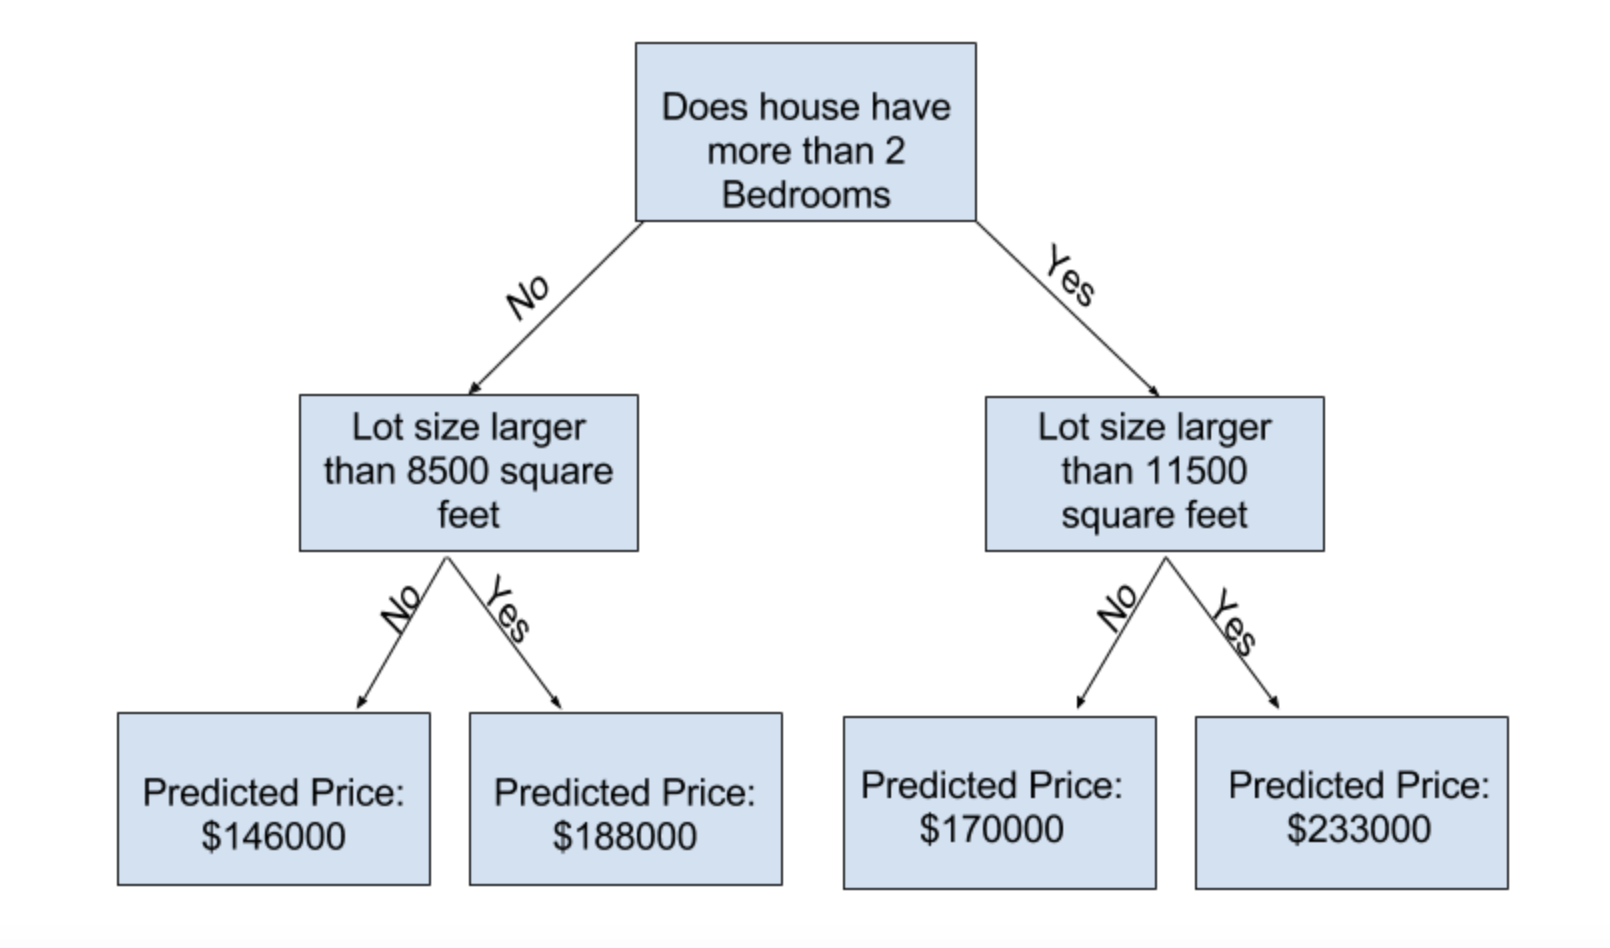

In practice, it's not uncommon for a tree to have 10 splits between the top level (all houses) and a leaf. As the tree gets deeper, the dataset gets sliced up into leaves with fewer houses. If a tree only had 1 split, it divides the data into 2 groups. If each group is split again, we would get 4 groups of houses. Splitting each of those again would create 8 groups. If we keep doubling the number of groups by adding more splits at each level, we'll have  210
  groups of houses by the time we get to the 10th level. That's 1024 leaves.

When we divide the houses amongst many leaves, we also have fewer houses in each leaf. Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses).

This is a phenomenon called **overfitting**, where a model matches the training data almost perfectly, but does poorly in validation and other new data. On the flip side, if we make our tree very shallow, it doesn't divide up the houses into very distinct groups.

At an extreme, if a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses, even in the training data (and it will be bad in validation too for the same reason). When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called **underfitting**.

Since we care about accuracy on new data, which we estimate from our validation data, we want to find the sweet spot between underfitting and overfitting. Visually, we want the low point of the (red) validation curve in the figure below.

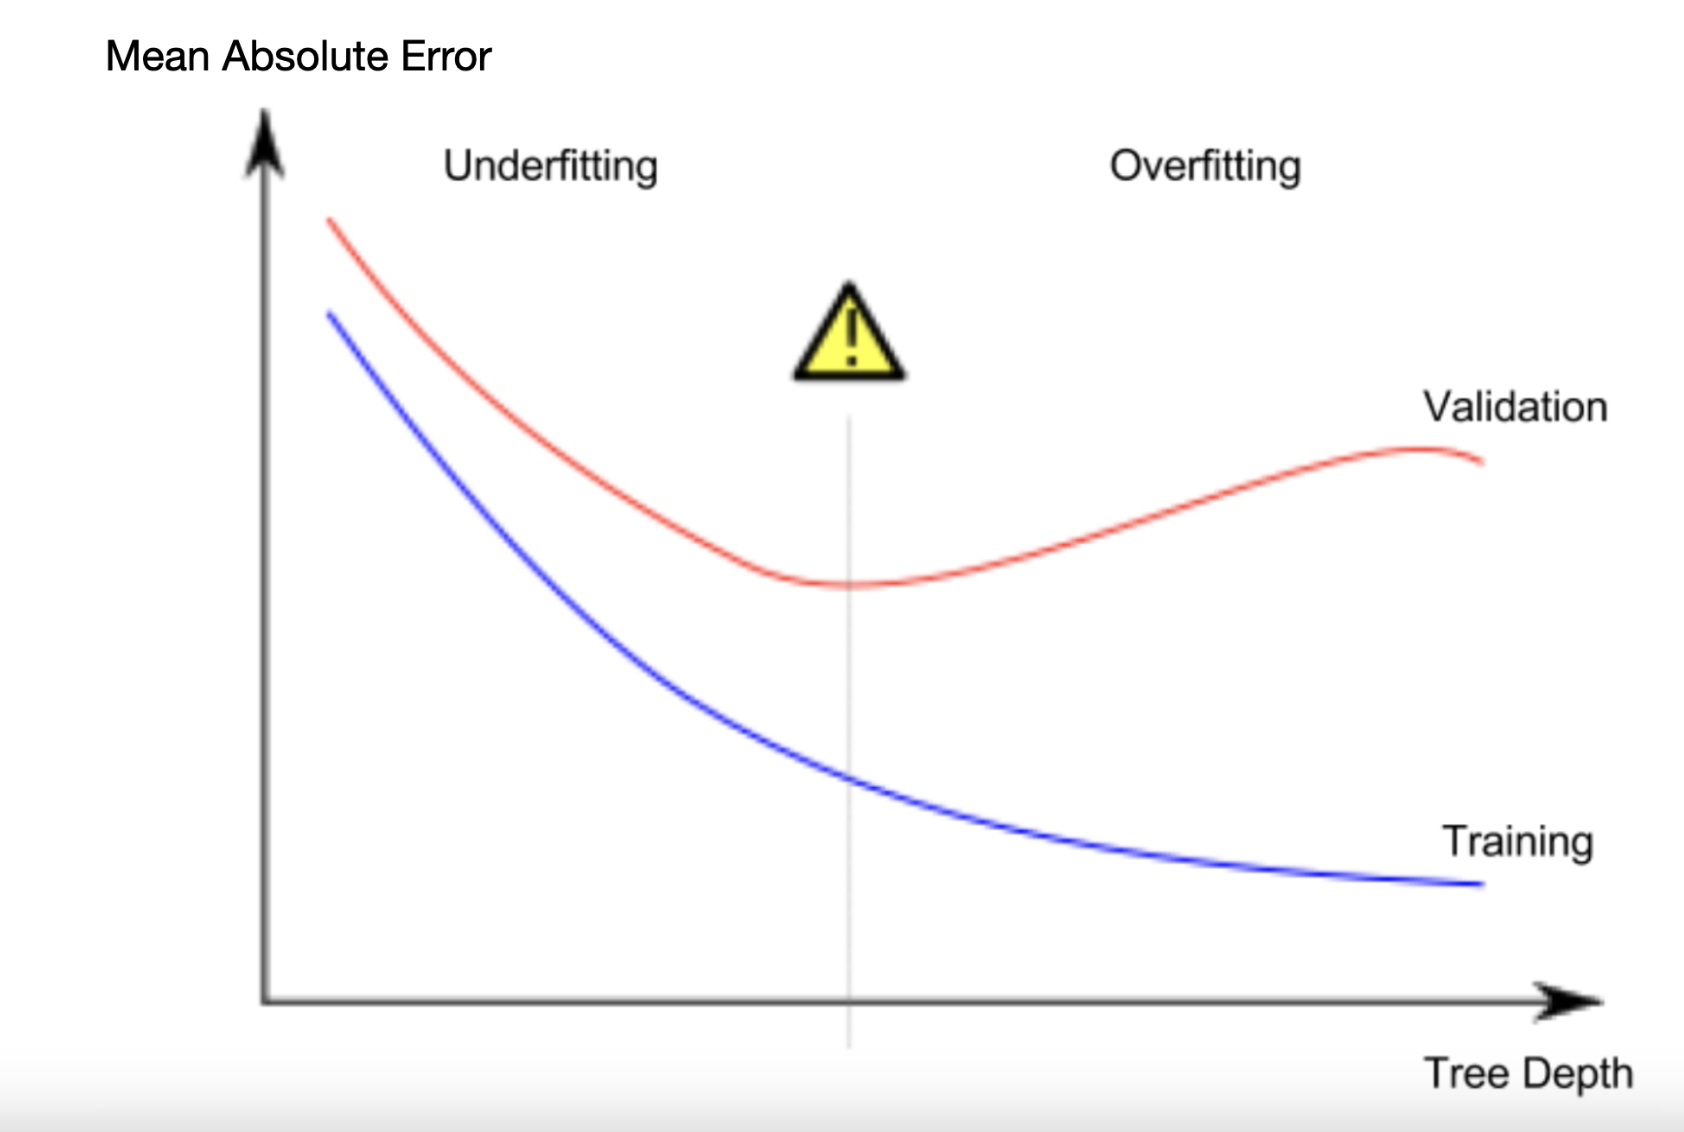

Example
There are a few alternatives for controlling the tree depth, and many allow for some routes through the tree to have greater depth than other routes. But the max_leaf_nodes argument provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

We can use a utility function to help compare MAE scores from different values for max_leaf_nodes:

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

The data is loaded into train_X, val_X, train_y and val_y using the code you've already seen (and which you've already written).

We can use a for-loop to compare the accuracy of models built with different values for max_leaf_nodes.

In [ ]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  377227
Max leaf nodes: 50  		 Mean Absolute Error:  300143
Max leaf nodes: 500  		 Mean Absolute Error:  279154
Max leaf nodes: 5000  		 Mean Absolute Error:  287563


Of the options listed, 500 is the optimal number of leaves.

## Random Forests
Using a more sophisticated machine learning algorithm.

### Introduction
Decision trees leave you with a difficult decision. A deep tree with lots of leaves will overfit because each prediction is coming from historical data from only the few houses at its leaf. But a shallow tree with few leaves will perform poorly because it fails to capture as many distinctions in the raw data.

Even today's most sophisticated modeling techniques face this tension between underfitting and overfitting. But, many models have clever ideas that can lead to better performance. We'll look at the random forest as an example.

The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters. If you keep modeling, you can learn more models with even better performance, but many of those are sensitive to getting the right parameters.

Example
You've already seen the code to load the data a few times. At the end of data-loading, we have the following variables:

train_X
val_X
train_y
val_y

We build a random forest model similarly to how we built a decision tree in scikit-learn - this time using the RandomForestRegressor class instead of DecisionTreeRegressor.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


# Load data
melbourne_file_path = 'melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path)
# Filter rows with missing values
melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea',
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

191669.7536453626
